# Mòdul 6 - Exercicis

## Exercicis d'algoritmes d'Agrupació.

### Exercici 1: Descarrega el dataset adjunt, de registres de publicacions a Facebook sobre Tailàndia, i classifica els diferents registres utilitzant l'algorisme de K-means.
### Important: Tingues en compte que prèviament et caldrà preparar el dataset.

In [184]:
# Importem les llibreries necesssaries per treballar
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [185]:
# Carreguem el dataset i el mostrem
df = pd.read_csv('Publicacions Facebook Thailandia.csv')
df

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
0,246675545449582_1649696485147474,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0,NaN,NaN,NaN,NaN
1,246675545449582_1649426988507757,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0,NaN,NaN,NaN,NaN
2,246675545449582_1648730588577397,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0,NaN,NaN,NaN,NaN
3,246675545449582_1648576705259452,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0,NaN,NaN,NaN,NaN
4,246675545449582_1645700502213739,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7045,1050855161656896_1061863470556065,photo,9/24/2016 2:58,89,0,0,89,0,0,0,0,0,NaN,NaN,NaN,NaN
7046,1050855161656896_1061334757275603,photo,9/23/2016 11:19,16,0,0,14,1,0,1,0,0,NaN,NaN,NaN,NaN
7047,1050855161656896_1060126464063099,photo,9/21/2016 23:03,2,0,0,1,1,0,0,0,0,NaN,NaN,NaN,NaN
7048,1050855161656896_1058663487542730,photo,9/20/2016 0:43,351,12,22,349,2,0,0,0,0,NaN,NaN,NaN,NaN


### PREPAREM EL DATASET

In [186]:
# Demanem informació amb el mètode info(). Aquest mètode ens mostra el nombre de valors nuls per cada entrada  en cada camp del
# dataset. Observem que hi ha dos casos, un on cap valor es nul (columnds amb camps correctament identificats) 
# i d'altre on tots les valors son nuls (NaN) que corresponen a 4 columnes sense identificar (sense camp) que caldra eliminar.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   status_id         7050 non-null   object 
 1   status_type       7050 non-null   object 
 2   status_published  7050 non-null   object 
 3   num_reactions     7050 non-null   int64  
 4   num_comments      7050 non-null   int64  
 5   num_shares        7050 non-null   int64  
 6   num_likes         7050 non-null   int64  
 7   num_loves         7050 non-null   int64  
 8   num_wows          7050 non-null   int64  
 9   num_hahas         7050 non-null   int64  
 10  num_sads          7050 non-null   int64  
 11  num_angrys        7050 non-null   int64  
 12  Column1           0 non-null      float64
 13  Column2           0 non-null      float64
 14  Column3           0 non-null      float64
 15  Column4           0 non-null      float64
dtypes: float64(4), int64(9), object(3)
memory 

In [187]:
# Ho comprovem amb el mètode isnull() i l'atribut suma
df.isnull().sum()

status_id              0
status_type            0
status_published       0
num_reactions          0
num_comments           0
num_shares             0
num_likes              0
num_loves              0
num_wows               0
num_hahas              0
num_sads               0
num_angrys             0
Column1             7050
Column2             7050
Column3             7050
Column4             7050
dtype: int64

<Axes: >

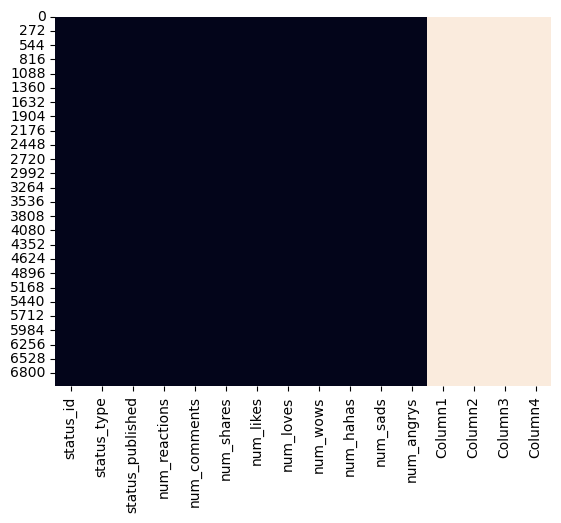

In [188]:
# Tornem a comprovar-ho, ara visualment amb seaborn usant un mapa de calor
sns.heatmap(df.isnull(), cbar=False)

In [189]:
# Altra cosa que cal comprovar es si hi ha entrades amb valors duplicats i ho fem amb el mètode duplicated() i l'atritut suma
df.duplicated().sum()

51

In [190]:
# Pasem a eliminar les entrades duplicades amb el metode drop_duplicates()
df.drop_duplicates(inplace=True)

In [191]:
# Obervem en imprimir el dataset que hi hem eliminat 51 files que contenien valors duplicats
df

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
0,246675545449582_1649696485147474,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0,NaN,NaN,NaN,NaN
1,246675545449582_1649426988507757,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0,NaN,NaN,NaN,NaN
2,246675545449582_1648730588577397,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0,NaN,NaN,NaN,NaN
3,246675545449582_1648576705259452,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0,NaN,NaN,NaN,NaN
4,246675545449582_1645700502213739,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7045,1050855161656896_1061863470556065,photo,9/24/2016 2:58,89,0,0,89,0,0,0,0,0,NaN,NaN,NaN,NaN
7046,1050855161656896_1061334757275603,photo,9/23/2016 11:19,16,0,0,14,1,0,1,0,0,NaN,NaN,NaN,NaN
7047,1050855161656896_1060126464063099,photo,9/21/2016 23:03,2,0,0,1,1,0,0,0,0,NaN,NaN,NaN,NaN
7048,1050855161656896_1058663487542730,photo,9/20/2016 0:43,351,12,22,349,2,0,0,0,0,NaN,NaN,NaN,NaN


In [192]:
# Analitzem les columnes (camps) on ja hem comprovat que hi ha 4 no identificades amb tots els valors nuls
df.columns

Index(['status_id', 'status_type', 'status_published', 'num_reactions',
       'num_comments', 'num_shares', 'num_likes', 'num_loves', 'num_wows',
       'num_hahas', 'num_sads', 'num_angrys', 'Column1', 'Column2', 'Column3',
       'Column4'],
      dtype='object')

In [193]:
# Per tant, es eliminen indicant correctament el eix (axis=1) que significa seleccionar l'objecte entre columnes horitzontalment
# en cas contrari axis=0 seleccionarà  l'objecte entre files verticalment. inplance=True ens retorna la taula actualitzada amb 
# les modificacions fetes, en canvi, inplance=False ens retornaria una copia guardant-nos la taula original.
df.drop(['Column1', 'Column2', 'Column3', 'Column4'], axis=1, inplace=True)

In [194]:
# Observem que ens retorna la taula actualitzada amb les quatre columnes innecessàries eliminades
df

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,246675545449582_1649696485147474,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0
1,246675545449582_1649426988507757,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0
2,246675545449582_1648730588577397,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0
3,246675545449582_1648576705259452,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0
4,246675545449582_1645700502213739,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
7045,1050855161656896_1061863470556065,photo,9/24/2016 2:58,89,0,0,89,0,0,0,0,0
7046,1050855161656896_1061334757275603,photo,9/23/2016 11:19,16,0,0,14,1,0,1,0,0
7047,1050855161656896_1060126464063099,photo,9/21/2016 23:03,2,0,0,1,1,0,0,0,0
7048,1050855161656896_1058663487542730,photo,9/20/2016 0:43,351,12,22,349,2,0,0,0,0


In [195]:
# Amb df.reset_index() restablirem l'índex eliminant els nombres sobrants (drop=True) i substituint-los (inplace = True) pels nous.
df.reset_index(drop=True, inplace = True)

In [196]:
# Podem observar-ho en la impressió següent del dataframe.
df

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,246675545449582_1649696485147474,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0
1,246675545449582_1649426988507757,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0
2,246675545449582_1648730588577397,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0
3,246675545449582_1648576705259452,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0
4,246675545449582_1645700502213739,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
6994,1050855161656896_1061863470556065,photo,9/24/2016 2:58,89,0,0,89,0,0,0,0,0
6995,1050855161656896_1061334757275603,photo,9/23/2016 11:19,16,0,0,14,1,0,1,0,0
6996,1050855161656896_1060126464063099,photo,9/21/2016 23:03,2,0,0,1,1,0,0,0,0
6997,1050855161656896_1058663487542730,photo,9/20/2016 0:43,351,12,22,349,2,0,0,0,0


In [197]:
# El mètode describe() ens retorna una taula amb estadístiques descriptives que inclouen aquelles que resumeixen la tendència central, 
# la dispersió i la forma de la distribució del conjunt de dades, excloent els valors NaN (ja eliminats en aquesta taula)
# La propietat T transposa l'índex i les columnes.
df.describe().T

,count,mean,std,min,25%,50%,75%,max
num_reactions,6999.0,224.994571,452.880746,0.0,17.0,58.0,216.0,4710.0
num_comments,6999.0,225.552079,892.743010,0.0,0.0,4.0,22.0,20990.0
num_shares,6999.0,40.258608,132.046903,0.0,0.0,0.0,4.0,3424.0
num_likes,6999.0,209.946707,439.550330,0.0,17.0,57.0,182.0,4710.0
num_loves,6999.0,12.751536,40.106872,0.0,0.0,0.0,3.0,657.0
num_wows,6999.0,1.252893,8.725551,0.0,0.0,0.0,0.0,278.0
num_hahas,6999.0,0.697957,3.970912,0.0,0.0,0.0,0.0,157.0
num_sads,6999.0,0.232605,1.481105,0.0,0.0,0.0,0.0,51.0
num_angrys,6999.0,0.110159,0.688582,0.0,0.0,0.0,0.0,31.0


<Axes: xlabel='status_type', ylabel='count'>

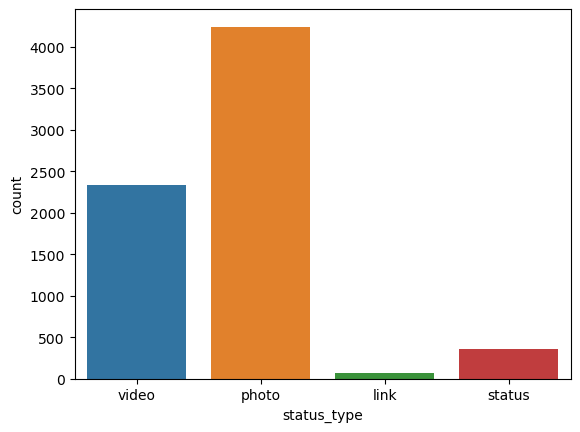

In [198]:
# Mostrem en un histograma el nombre de cada opció compartida en la xarxa (vídeo, foto, enllaç o canvi d'estatus) 
# Observem que el que més es comparteix són fotos, seguit de vídeos, canvis d'estatus i enllaços.
sns.countplot(data = df, x = 'status_type')

In [199]:
# Eliminem dues columnes que considerem no seran rellevants en l'estudi de dades que volem fer: status_id i status_published
# i creem una taula nova sense aquests camps tot i conservant la original ja neta.
df_scaled = df.drop(['status_id', 'status_published'], axis=1)
df_scaled.head()

,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,video,529,512,262,432,92,3,1,1,0
1,photo,150,0,0,150,0,0,0,0,0
2,video,227,236,57,204,21,1,1,0,0
3,photo,111,0,0,111,0,0,0,0,0
4,photo,213,0,0,204,9,0,0,0,0


In [200]:
# La funció unique() en pandes s'utilitza per trobar els valors únics d'una sèrie. Una sèrie és una sola columna d'un marc de dades.
# En aquest cas, status_type, i ens mostra els 4 valors que ja hem vist (video, photo, link i status) en una llista a més d'indicar-nos
# que es tracta d'un objecte (categòrica) i, per tant, un valor que no admet objecció o discussió.
df_scaled.status_type.unique()

array(['video', 'photo', 'link', 'status'], dtype=object)

### PREPROCESSAMENT

#### VARIABLE CATEGÒRICA

In [201]:
# la funció pd.get_dummies converteix la variable categòrica en variables fictícies/indicadores.
# Cada variable es converteix en tantes variables 0/1 com valors diferents (per fer-ho multipliquem el procediment per 1)
# Les columnes de la sortida reben cada nom d'un valor; si l'entrada és un DataFrame, el nom de la variable original s'anteposa al valor.
# Aquí fem servir el paràmetre drop_first=True que eliminarà la primera variable fictícia, 
# per tant donarà n-1 dúmmies de n nivells categòrics discrets eliminant el primer nivell. 
# En aquest cas correspon a 'link' que te pocs valors 1.

dummies = pd.get_dummies(df_scaled['status_type'], prefix='type_', drop_first = True)*1
dummies

,type__photo,type__status,type__video
0,0,0,1
1,1,0,0
2,0,0,1
3,1,0,0
4,1,0,0
...,...,...,...
6994,1,0,0
6995,1,0,0
6996,1,0,0
6997,1,0,0


#### VARIABLES NUMÈRIQUES

In [202]:
# Per preprocessar les variables numèriques, usarem la prova d'Anderson-Darling per a les dades 
# procedents d'una distribució particular (aquesta prova la trobem implementada a la biblioteca SciPy).
from scipy.stats import anderson

In [203]:
# La prova Anderson-Darling prova la hipòtesi nul·la que una mostra s'extreu d'una població que segueix una distribució particular.
anderson(df_scaled['num_reactions'])

AndersonResult(statistic=1178.2833226317325, critical_values=array([0.576, 0.656, 0.787, 0.917, 1.091]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]), fit_result=  params: FitParams(loc=224.99457065295042, scale=452.88074616585294)
 success: True
 message: '`anderson` successfully fit the distribution to the data.')

In [204]:
df_scaled.head()

,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,video,529,512,262,432,92,3,1,1,0
1,photo,150,0,0,150,0,0,0,0,0
2,video,227,236,57,204,21,1,1,0,0
3,photo,111,0,0,111,0,0,0,0,0
4,photo,213,0,0,204,9,0,0,0,0


In [205]:
# Definim un parell de llistes per identificar quins camps amb els seus valors segueixen una distribució gaussiana i quins altres no ho fan.

gauss = []
no_gauss = []

for column in df_scaled.drop('status_type', axis=1):
    result = anderson(df_scaled[column])
    if result.statistic < result.critical_values[2]:
        gauss.append(column)
    else:
        no_gauss.append(column)

In [206]:
# La llista amb camps que descriuen amb els seus valors una distribució gaussiana o normal queda buida.
gauss

[]

In [207]:
# La totalitat dels camps descriuen amb els seus valors una distribució no gaussiana.
no_gauss

['num_reactions',
 'num_comments',
 'num_shares',
 'num_likes',
 'num_loves',
 'num_wows',
 'num_hahas',
 'num_sads',
 'num_angrys']

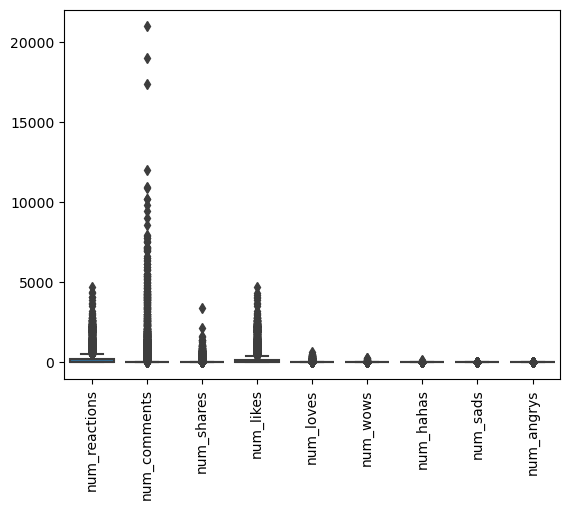

In [208]:
# Ho observem millor a continuació amb una visualització usant el mètode boxplot (diagrama de caixes) de 'seaborn'
# i emprant la funció xticks() de 'matplotlib' per rotar 90 graus les etiquetes del eix x.
sns.boxplot(df_scaled.drop('status_type', axis=1))
plt.xticks(rotation=90);

In [209]:
# Els outliers són valors atípics dins d'un conjunt de dades. 
# En termes simples, un outlier és un valor que s'allunya significativament dels altres valors en el conjunt de dades, 
# ja sigui extremadament alt o extremadament baix en comparació amb els valors circumdants.
# Creem dues llistes buides per identifiar aquests valors millors mitjançant una cerca per columnes

outlier = []
no_outlier = []

for column in df_scaled.drop('status_type', axis=1):
    q1 = df_scaled[column].quantile(0.25)
    q3 = df_scaled[column].quantile(0.75)
    iqr = q3-q1
    if any((df_scaled[column] <= q1-1.5*iqr) | (df_scaled[column] >= q3+1.5*iqr)):
        outlier.append(column)
    else:
        no_outlier.append(column)

In [210]:
# Totes les columnes contenen valors atípics, la qual cosa quadra amb la distribució no gaussiana.
outlier

['num_reactions',
 'num_comments',
 'num_shares',
 'num_likes',
 'num_loves',
 'num_wows',
 'num_hahas',
 'num_sads',
 'num_angrys']

In [211]:
# No hi ha cap camp que estigui exempt de valors atípics.
no_outlier

[]

In [212]:
# La classe sklearn.preprocessing.RobustScaler escala les característiques utilitzant estadístiques que són robustes a valors atípics.
# Aquest escalador elimina la mediana i escala les dades d'acord amb l'interval quantil (per defecte a IQR: Interval interquartil).
# L'IQR és el rang entre el 1r quartil (25 quantil) i el 3r quartil (75è quantil).
from sklearn.preprocessing import RobustScaler

In [213]:
# El centre i l'escalat ocorren de manera independent en cada característica mitjançant la computació de les estadístiques
# rellevants sobre les mostres en el conjunt d'entrenament. Després s'emmagatzema la mediana i l'interval interquartil 
# per a ser utilitzat en dades posteriors utilitzant el mètode de transformació 'transform'.
rs = RobustScaler()
df_scaled[outlier] = rs.fit_transform(df_scaled[outlier])

In [214]:
# A continuació és mostra el resultat
df_scaled

,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,video,2.366834,23.090909,65.50,2.272727,30.666667,3.0,1.0,1.0,0.0
1,photo,0.462312,-0.181818,0.00,0.563636,0.000000,0.0,0.0,0.0,0.0
2,video,0.849246,10.545455,14.25,0.890909,7.000000,1.0,1.0,0.0,0.0
3,photo,0.266332,-0.181818,0.00,0.327273,0.000000,0.0,0.0,0.0,0.0
4,photo,0.778894,-0.181818,0.00,0.890909,3.000000,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
6994,photo,0.155779,-0.181818,0.00,0.193939,0.000000,0.0,0.0,0.0,0.0
6995,photo,-0.211055,-0.181818,0.00,-0.260606,0.333333,0.0,1.0,0.0,0.0
6996,photo,-0.281407,-0.181818,0.00,-0.339394,0.333333,0.0,0.0,0.0,0.0
6997,photo,1.472362,0.363636,5.50,1.769697,0.666667,0.0,0.0,0.0,0.0


### PCA - REDUCCIÓ DE DIMENSIONALITAT
#### En l'aprenentatge automàtic, la reducció de dimensionalitat s'utilitza generalment per accelerar l'entrenament d'un model.

In [215]:
# Principal component analysis (PCA) és una tècnica de reducció de dimensionalitat lineal amb aplicacions 
# en l'anàlisi exploratòria de dades, visualització i preprocessament de dades.
# Utilitzarem la biblioteca sklearn per importar el mòdul PCA.
from sklearn.decomposition import PCA

In [216]:
# El PCA funciona força bé en el tractament de dades amb valors atìpics (outliers)
outlier

['num_reactions',
 'num_comments',
 'num_shares',
 'num_likes',
 'num_loves',
 'num_wows',
 'num_hahas',
 'num_sads',
 'num_angrys']

In [217]:
# PCA s'utilitza més comunament quan moltes de les variables estan altament correlacionades entre si 
# i és desitjable reduir el seu nombre a un conjunt independent. El primer component principal es pot definir 
# de manera equivalent com una direcció que maximitza la variància de les dades projectades.
# En aquest se'ns determina un nombre de components principals equivalent a 9 que són els camps amb outliers.
pca = PCA()
pca.fit_transform(df_scaled[outlier])
pca.n_components_

9

In [218]:
# La relació de variància explicada (atribut explained_variance_ratio_) és una mesura de la proporció de la variància total 
# en el conjunt de dades original que s'explica per cada component principal. La proporció de variància explicada d'un component 
# principal és igual a la proporció del seu valor propi a la suma dels valors propis de tots els components principals.
pca.explained_variance_ratio_

array([7.84337406e-01, 1.70025075e-01, 2.43677715e-02, 1.30587924e-02,
       3.73572126e-03, 3.67530881e-03, 6.68379165e-04, 1.31545205e-04,
       3.43318848e-11])

In [219]:
# Definim la llista dels nou components principals
[x for x in range(1, pca.n_components_+1)]

[1, 2, 3, 4, 5, 6, 7, 8, 9]

In [220]:
# Generem el diccionari que correlaciona claus i valors
eigen = {
    'PC': [x for x in range(1, pca.n_components_+1)],
    'Eigenvalues': pca.explained_variance_ratio_,
    'Cumulative Eigenvalues': pca.explained_variance_ratio_.cumsum()
}

In [221]:
# Convertim el diccionari en una matriu que sigui facil de representar gràficament
df_plot = pd.DataFrame(eigen)

In [222]:
df_plot.head()

,PC,Eigenvalues,Cumulative Eigenvalues
0,1,0.784337,0.784337
1,2,0.170025,0.954362
2,3,0.024368,0.978730
3,4,0.013059,0.991789
4,5,0.003736,0.995525


<Axes: xlabel='PC', ylabel='Eigenvalues'>

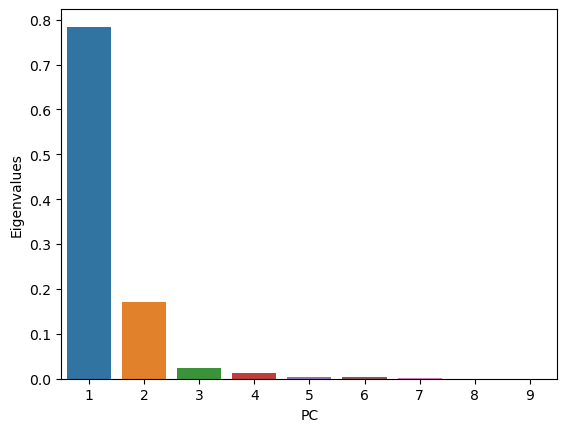

In [223]:
# Visualitzem amb un diagrama de barres els components principals (eix x) i relació de variància explicada (eix y)
sns.barplot(data=df_plot, x='PC', y='Eigenvalues')

C:\Users\52715488V\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\52715488V\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


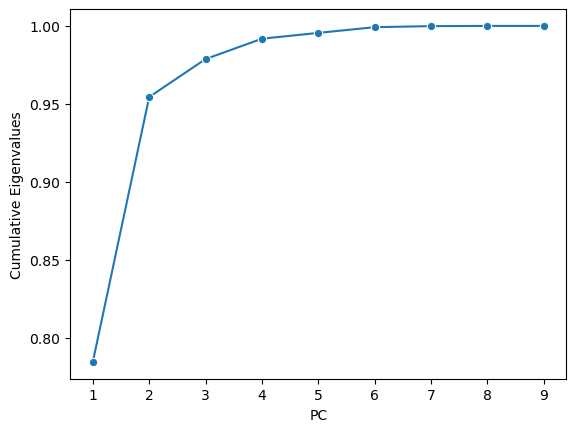

In [224]:
# I amb altre grafic de línies el valor acumulat de relació de variància explicada
sns.lineplot(data = df_plot, x = 'PC', y = 'Cumulative Eigenvalues', marker = 'o');

In [225]:
# Aplicarem el mètode PCA on passarem el nombre de components (n.components=2).
pca = PCA(n_components=2)
pca

PCA(n_components=2)

In [226]:
# I finalment cridarem fit.transform sobre les dades agregades. Aquí, diversos components representen la dimensió inferior en la qual 
# projectarem les nostres dades de dimensió superior. En aquest cas, hi quedaria un dimensionament reduït a 3 components.
data_pca = pca.fit_transform(df_scaled[outlier])
pca.n_components_

2

In [227]:
# Si executem pca, veiem que ens mostra n.components=0.97
pca

PCA(n_components=2)

In [228]:
# Altra forma doncs de treballar podria haver estat directament aquesta:
pca = PCA(n_components=0.97)
pca

PCA(n_components=0.97)

In [229]:
data_pca = pca.fit_transform(df_scaled[outlier])
pca.n_components_

3

In [230]:
pca

PCA(n_components=0.97)

In [231]:
# Definirem una nova matriu formada per tres components principals que anomenarem PC1, PC2 i PC3.
df_pca = pd.DataFrame(data = data_pca, columns = ['PC1', 'PC2', 'PC3'])
df_pca

,PC1,PC2,PC3
0,48.141927,39.279885,-1.810818
1,-14.873807,-2.241151,-0.564765
2,3.371249,3.438150,-0.012092
3,-14.877890,-2.247779,-0.587971
4,-14.268106,-1.394616,1.128641
...,...,...,...
6994,-14.880194,-2.251517,-0.601062
6995,-14.788323,-2.142925,-0.329232
6996,-14.822736,-2.173432,-0.468840
6997,-11.064314,1.577548,-1.892919


In [232]:
# Recordem la matriu amb les dummies generades abans
dummies

,type__photo,type__status,type__video
0,0,0,1
1,1,0,0
2,0,0,1
3,1,0,0
4,1,0,0
...,...,...,...
6994,1,0,0
6995,1,0,0
6996,1,0,0
6997,1,0,0


In [233]:
# Concatenem la matriu 'pca' amb les 'dummies' per a usar el resultat com a model.
df_model = pd.concat([df_pca, dummies], axis=1)

In [234]:
df_model

,PC1,PC2,PC3,type__photo,type__status,type__video
0,48.141927,39.279885,-1.810818,0,0,1
1,-14.873807,-2.241151,-0.564765,1,0,0
2,3.371249,3.438150,-0.012092,0,0,1
3,-14.877890,-2.247779,-0.587971,1,0,0
4,-14.268106,-1.394616,1.128641,1,0,0
...,...,...,...,...,...,...
6994,-14.880194,-2.251517,-0.601062,1,0,0
6995,-14.788323,-2.142925,-0.329232,1,0,0
6996,-14.822736,-2.173432,-0.468840,1,0,0
6997,-11.064314,1.577548,-1.892919,1,0,0


### K-MEANS - MODELATGE

In [235]:
# Importem el mòdul KMeans de la classe sklearn.cluster de la biblioteca Scikit-Learn
# K-means és un algorisme de classificació no supervisada (clusterizació) que agrupa objectes en k grups basant-se en les seves característiques. 
# L'agrupament es realitza minimitzant la suma de distàncies entre cada objecte i el centroide del seu grup o clúster.
from sklearn.cluster import KMeans

In [236]:
# Generem aplicant aquest algorisme una llista amb les inèrcies.
# n_init indica el nombre de vegades que l'algorisme k-means s'executarà amb diferents llavors centroides. 
# Els resultats finals seran la millor sortida de n_init tirades consecutives en termes d'inèrcia.
# En aquest cas 10. 

inercies = []

for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, n_init=10)
    kmeans.fit(df_model)
    inercies.append(kmeans.inertia_)

In [237]:
# I la mostrem
inercies

[20701873.476325173,
 9550007.323062796,
 6526366.9660296105,
 5079948.397725607,
 3932349.595368515,
 3208116.018916013,
 2567165.476647089,
 2183435.8258690666,
 1933260.1692531724]

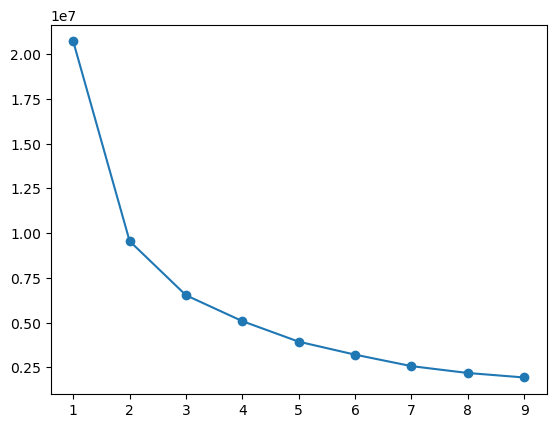

In [238]:
# Les inèrcies les podem representar amb aquest gràfic lineal
plt.plot(range(1,10), inercies, marker='o');

In [239]:
# Forcem el entrenament d'aquest model en aplicar el algorisme per a un nombre de 3 clusters 10 cops.
km = KMeans(n_clusters=3, n_init=10)
km.fit(df_model)

km_cluster = km.labels_

In [240]:
# El resultat és un array o matriu estructurada unidimensional (d'un sol índex)
km_cluster

array([2, 0, 0, ..., 0, 0, 0])

In [241]:
# Amb una longitud equivalent al nombre d'entrades del dataset
len(km_cluster)

6999

In [242]:
# Recordant el dataset inicial
df.head()

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,246675545449582_1649696485147474,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0
1,246675545449582_1649426988507757,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0
2,246675545449582_1648730588577397,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0
3,246675545449582_1648576705259452,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0
4,246675545449582_1645700502213739,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0


In [243]:
# Mirant la seva forma (observem que esta formada per 6999 línies - entrades - i 12 columnes - camps -).
df.shape

(6999, 12)

In [244]:
# Associem el dataset inicial amb l'array 'km_cluster'
df['cluster_kmeans'] = km_cluster
df.head(15)

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,cluster_kmeans
0,246675545449582_1649696485147474,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0,2
1,246675545449582_1649426988507757,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0,0
2,246675545449582_1648730588577397,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0,0
3,246675545449582_1648576705259452,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0,0
4,246675545449582_1645700502213739,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0,0
5,246675545449582_1645650162218773,photo,4/18/2018 2:14,217,6,0,211,5,1,0,0,0,0
6,246675545449582_1645564175560705,video,4/18/2018 0:24,503,614,72,418,70,10,2,0,3,0
7,246675545449582_1644824665634656,video,4/17/2018 7:42,295,453,53,260,32,1,1,0,1,0
8,246675545449582_1644655795651543,photo,4/17/2018 3:33,203,1,0,198,5,0,0,0,0,0
9,246675545449582_1638788379571618,photo,4/11/2018 4:53,170,9,1,167,3,0,0,0,0,0


In [245]:
# Ara apliquem a la matriu anterior la funció de pandas value_counts() 
# Cal recordar que La funció value_counts() retorna una sèrie que conté recomptes de valors únics. 
# Retorna un objecte que estarà en ordre descendent de manera que el seu primer element serà l'element més freqüent.
df.cluster_kmeans.value_counts()

cluster_kmeans
0    6448
2     478
1      73
Name: count, dtype: int64

### VISUALITZACIONS

AttributeError: 'numpy.int32' object has no attribute 'startswith'

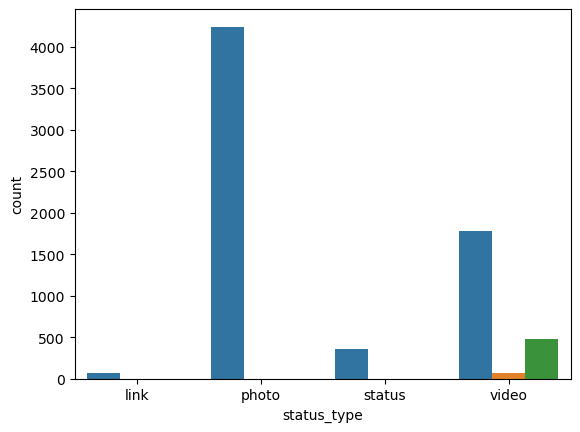

In [246]:
# Mostrem un diagrama de barres fent un agrupament del tipus d'estatus i la matriu 'cluster_Kmeans' amb la 
# funció groupby de pandas. Agrupa el dataframe utilitzant un mapador o per una sèrie de columnes.
# Una operació groupby implica una combinació de dividir l'objecte, aplicar una funció i combinar els resultats. 
# Això es pot utilitzar per agrupar grans quantitats de dades i calcular operacions sobre aquests grups.
sns.barplot(data=df.groupby(['status_type', 'cluster_kmeans']).size().reset_index(name='count'),
             x='status_type', y='count', hue='cluster_kmeans');

In [247]:
# Apliquem de nou la funció groupby per agrupar 'status_type' i 'cluster-kmeans' amb l'atribut suma i transposant
# el índex i les columnes
df.groupby(['status_type', 'cluster_kmeans']).sum().T

status_type                                                    link  \
cluster_kmeans                                                    0   
status_id         246675545449582_149727236372322124667554544958...   
status_published  12/8/2017 2:375/5/2017 23:274/26/2017 0:112/27...   
num_reactions                                                 23319   
num_comments                                                    359   
num_shares                                                      277   
num_likes                                                     23286   
num_loves                                                        19   
num_wows                                                         12   
num_hahas                                                         2   
num_sads                                                          0   
num_angrys                                                        0   

status_type                                                   photo  \
cluster_kmeans                                                    0   
status_id         246675545449582_164942698850775724667554544958...   
status_published  4/21/2018 22:454/21/2018 2:294/18/2018 3:224/1...   
num_reactions                                                725148   
num_comments                                                  54833   
num_shares                                                     9032   
num_likes                                                    715399   
num_loves                                                      5658   
num_wows                                                       2591   
num_hahas                                                       786   
num_sads                                                        532   
num_angrys                                                      169   

status_type                                          \
cluster_kmeans                                    1   
status_id         1050855161656896_1457633917645683   
status_published                    11/24/2017 2:23   
num_reactions                                   272   
num_comments                                  10194   
num_shares                                       25   
num_likes                                       256   
num_loves                                         5   
num_wows                                          9   
num_hahas                                         2   
num_sads                                          0   
num_angrys                                        0   

status_type                                                          \
cluster_kmeans                                                    2   
status_id         246675545449582_140439123301133524667554544958...   
status_published                        9/3/2017 5:395/11/2016 2:47   
num_reactions                                                  5952   
num_comments                                                    651   
num_shares                                                     1517   
num_likes                                                      5835   
num_loves                                                        85   
num_wows                                                         23   
num_hahas                                                         5   
num_sads                                                          4   
num_angrys                                                        0   

status_type                                                  status  \
cluster_kmeans                                                    0   
status_id         246675545449582_140693680942344424667554544958...   
status_published  9/6/2017 6:228/1/2017 0:577/31/2017 9:503/4/20...   
num_reactions                                                158944   
num_comments                                                  13078   
num_shares                                                      925   
num_likes      

In [248]:
# La clusterització de dades és una tècnica molt comuna en l'anàlisi estadística de dades. 
# Bàsicament és la classificació d'objectes similars en diferents grups, o més precisament, 
# la partició de les dades en diferents subconjunts (o clústers). Així doncs, les dades de cada subgrup idealment comparteixen un tret comú.
# En la següent matriu identifiquem els tres clusters que hem definit anteriorment per al status_type photo.
df[(df['status_type']=='photo') & ((df['cluster_kmeans']==1) | (df['cluster_kmeans']==2) ) ]

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,cluster_kmeans
166,246675545449582_1404391233011335,photo,9/3/2017 5:39,4410,633,257,4315,73,17,5,0,0,2
726,246675545449582_951985511585245,photo,5/11/2016 2:47,1542,18,1260,1520,12,6,0,4,0,2
6608,1050855161656896_1457633917645683,photo,11/24/2017 2:23,272,10194,25,256,5,9,2,0,0,1


### Exercici 2: Classifica els diferents registres utilitzant l'algorisme de clustering jeràrquic.

In [249]:
# SciPy és una llibreria de Python per a matemàtiques, ciències i enginyeria que proporciona mòduls per a optimització, 
# àlgebra lineal, integració, interpolació i altres tasques científiques i d'enginyeria.
# Així doncs, primer instal·larem SciPy, 
import sys
!{sys.executable} -m pip install scipy

In [250]:
from scipy.cluster.hierarchy import dendrogram, linkage

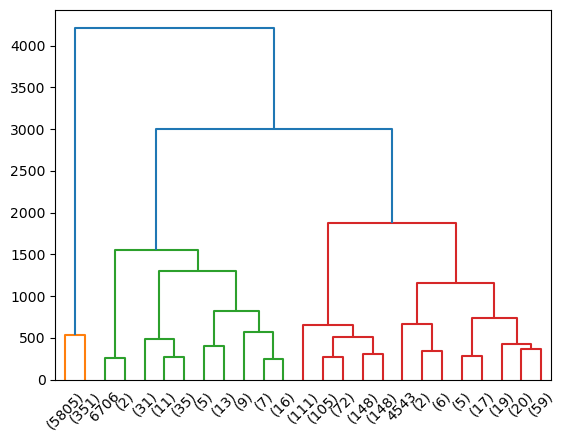

In [252]:
# El mètode 'linkage' permet realitzar clustering jeràrquic/aglomeratiu.
matrix = linkage(df_model, method='ward')

# El mètode 'dendogram' traça l'agrupament jeràrquic com un dendrograma. El dendrograma il·lustra com cada cúmul es compon dibuixant 
# un enllaç en forma d'U entre un cúmul no singular i els seus fills. La part superior de l'enllaç U indica una fusió de clústers. 
# Les dues potes de l'enllaç U indiquen quins cúmuls es van fusionar. La longitud de les dues potes de l'enllaç U representa la distància 
# entre els clústers fills. També és la distància cophenètica entre les observacions originals en els dos grups de clústers fills.
dendrogram(matrix, truncate_mode= 'lastp', p=25);

In [253]:
# El mètode AgglomerativeClustering del mòdul sklearn.cluster elabora un agrupament aglomeratiu, un dels mètodes d'agrupament de dades. 
# Al contrari que els KMeans, l'agrupament aglomeratiu suposa que totes les observacions (punts de dades) són clústers 
# i després intenta fusionar-los junts per obtenir el nombre desitjat de clústers.

from sklearn.cluster import AgglomerativeClustering

ac = AgglomerativeClustering(n_clusters=3, linkage='ward')
ac.fit(df_model)

ac_cluster = ac.labels_

In [254]:
# El resultat mostrat es un array unidimensional
ac_cluster

array([0, 1, 1, ..., 1, 1, 1], dtype=int64)

In [255]:
# Associant el array anterior, podem generar un nou dataframe que ens facilitarà la visualització dels tres clústers 
# segons el tipus d'estatus.
df['cluster_hierarchy'] = ac_cluster
df.head()

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,cluster_kmeans,cluster_hierarchy
0,246675545449582_1649696485147474,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0,2,0
1,246675545449582_1649426988507757,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0,0,1
2,246675545449582_1648730588577397,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0,0,1
3,246675545449582_1648576705259452,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0,0,1
4,246675545449582_1645700502213739,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0,0,1


### VISUALITZACIONS

AttributeError: 'numpy.int64' object has no attribute 'startswith'

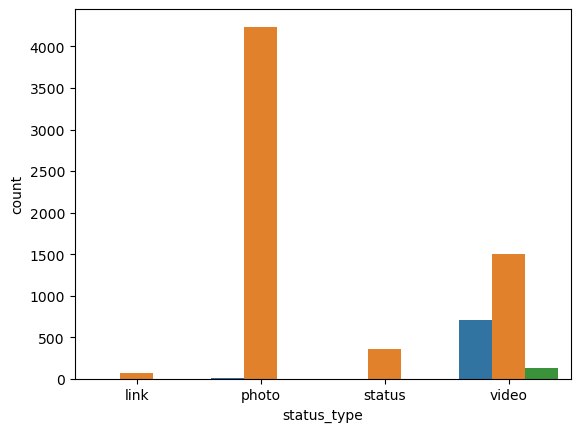

In [256]:
# Usant el mètode barplot de seaborn i groupby de pandas obtenim el següent gràfic:
sns.barplot(data=df.groupby(['status_type', 'cluster_hierarchy']).size().reset_index(name='count'),
             x='status_type', y='count', hue='cluster_hierarchy');

In [257]:
# Mostrem el dataseet amb l'associació dels diversos clústers jerarquics per al status_type == photo
df[(df['status_type']=='photo') & ((df['cluster_hierarchy']==0) | (df['cluster_hierarchy']==2) ) ]

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,cluster_kmeans,cluster_hierarchy
166,246675545449582_1404391233011335,photo,9/3/2017 5:39,4410,633,257,4315,73,17,5,0,0,2,0
562,246675545449582_1073903956060066,photo,10/16/2016 12:17,495,9,227,443,42,0,0,10,0,0,0
564,246675545449582_1073422289441566,photo,10/16/2016 0:48,476,3,212,452,16,0,0,8,0,0,0
726,246675545449582_951985511585245,photo,5/11/2016 2:47,1542,18,1260,1520,12,6,0,4,0,2,0
965,246675545449582_873001859483611,photo,1/11/2016 1:56,385,16,191,385,0,0,0,0,0,0,0
6608,1050855161656896_1457633917645683,photo,11/24/2017 2:23,272,10194,25,256,5,9,2,0,0,1,2


In [258]:
# Agrupament en un datasets els eliminen els resultats de l'anàlisi amb clústers kmeans i jerarquics que tenen relació
dfgroup = df.drop('cluster_kmeans',axis=1).groupby(['status_type', 'cluster_hierarchy']).sum().T
dfgroup

status_type                                                     link  \
cluster_hierarchy                                                  1   
status_id          246675545449582_149727236372322124667554544958...   
status_published   12/8/2017 2:375/5/2017 23:274/26/2017 0:112/27...   
num_reactions                                                  23319   
num_comments                                                     359   
num_shares                                                       277   
num_likes                                                      23286   
num_loves                                                         19   
num_wows                                                          12   
num_hahas                                                          2   
num_sads                                                           0   
num_angrys                                                         0   

status_type                                                    photo  \
cluster_hierarchy                                                  0   
status_id          246675545449582_140439123301133524667554544958...   
status_published   9/3/2017 5:3910/16/2016 12:1710/16/2016 0:485/...   
num_reactions                                                   7308   
num_comments                                                     679   
num_shares                                                      2147   
num_likes                                                       7115   
num_loves                                                        143   
num_wows                                                          23   
num_hahas                                                          5   
num_sads                                                          22   
num_angrys                                                         0   

status_type                                                           \
cluster_hierarchy                                                  1   
status_id          246675545449582_164942698850775724667554544958...   
status_published   4/21/2018 22:454/21/2018 2:294/18/2018 3:224/1...   
num_reactions                                                 723792   
num_comments                                                   54805   
num_shares                                                      8402   
num_likes                                                     714119   
num_loves                                                       5600   
num_wows                                                        2591   
num_hahas                                                        786   
num_sads                                                         514   
num_angrys                                                       169   

status_type                                           \
cluster_hierarchy                                  2   
status_id          1050855161656896_1457633917645683   
status_published                     11/24/2017 2:23   
num_reactions                                    272   
num_comments                                   10194   
num_shares                                        25   
num_likes                                        256   
num_loves                                          5   
num_wows                                           9   
num_hahas                                          2   
num_sads                                           0   
num_angrys                                         0   

status_type                                 status  \
cluster_hierarchy                                0   
status_id          725980084255106_829035553949558   
status_published                     3/8/2018 1:10   
num_reactions                                 1905   
num_comments                                  1186   
num_shares                                       2   
num_likes                                     1876   
num_loves                   

In [259]:
# Eliminem les dues primerres files (index)
dfgroup.drop(dfgroup.index[0:2], inplace=True)
dfgroup

status_type         link photo                status           video          \
cluster_hierarchy      1     0       1      2      0       1       0       1   
num_reactions      23319  7308  723792    272   1905  157039  269173  330835   
num_comments         359   679   54805  10194   1186   11892  700054  111153   
num_shares           277  2147    8402     25      2     923  199755   15825   
num_likes          23286  7115  714119    256   1876  155921  198360  320860   
num_loves             19   143    5600      5      7     542   62445    8890   
num_wows              12    23    2591      9     22     401    4773     440   
num_hahas              2     5     786      2      0      40    2700     424   
num_sads               0    22     514      0      0     126     481     147   
num_angrys             0     0     169      0      0       9     414      68   

status_type                
cluster_hierarchy       2  
num_reactions       61094  
num_comments       688317  
num_shares          54414  
num_likes           47624  
num_loves           11597  
num_wows              498  
num_hahas             926  
num_sads              338  
num_angrys            111

In [260]:
# l'atribut value_counts retorna una sèrie que conté recomptes de valors únics. 
# L'objecte resultant serà en ordre descendent de manera que el primer element sigui l'element més freqüent. 
# Exclou els valors NA per defecte.

In [261]:
# Recompte de valors únics per cada clúster obtingut amb l'aplicació de l'agrupament jeràrquic
df.cluster_hierarchy.value_counts()

cluster_hierarchy
1    6156
0     713
2     130
Name: count, dtype: int64

In [262]:
# Recompte de valors únics per cada clúster obtingut amb l'aplicació de l'agrupament amb mitjanes K
df.cluster_kmeans.value_counts()

cluster_kmeans
0    6448
2     478
1      73
Name: count, dtype: int64

### Exercici 3: Calcula el rendiment del clustering mitjançant un paràmetre com pot ser silhouette.

In [263]:
# L'anàlisi de la silueta es pot utilitzar per estudiar la distància de separació entre els clústers resultants. 
# El diagrama de silueta mostra una mesura de la proximitat de cada punt d'un clúster als punts dels clústers veïns i, 
# per tant, proporciona una manera d'avaluar paràmetres com el nombre de clústers visualment. Aquesta mesura té un rang de [-1, 1].
from sklearn.metrics import silhouette_score

In [266]:
# Mesurem el rendiment amb el paràmetre silhouette del dataset model i els resultants d'aplicar 'cluster_kmeans' i 
# 'cluster_hierarchy'.
ss_kmeans = silhouette_score(df_model, df['cluster_kmeans'])
ss_hierarchy = silhouette_score(df_model, df['cluster_hierarchy'])

In [265]:
# Mostrem els resultats, que observem força semblants.
print(f'kmeans: {ss_kmeans}, hierarchy: {ss_hierarchy}')

kmeans: 0.8676299495379065, hierarchy: 0.8474254107669119


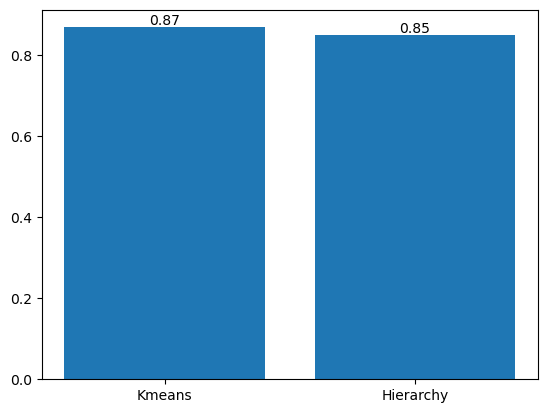

In [267]:
# I els representem amb un diagrama de barres, on tornem a observar que son força semblants.

plt.bar(['Kmeans', 'Hierarchy'], [ss_kmeans, ss_hierarchy])

for i, score in enumerate([ss_kmeans, ss_hierarchy]):
    plt.text(i, score, f'{score:.2f}', va='bottom', ha='center')